In [1]:
# Step1: Frame the Problem
# Predict delivery time using sorting time 

# Step2: Collect/Read Data
import pandas as pd
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [15]:
# Check Datatypes , null values, duplicates are present
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [16]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [17]:
df[df.duplicated()]

,Delivery Time,Sorting Time


In [18]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

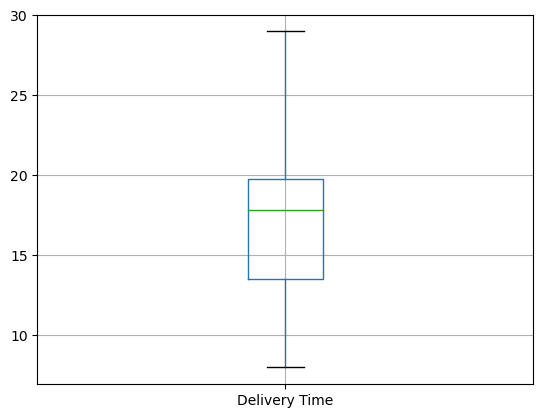

In [25]:
df.boxplot(column="Delivery Time")#no outliers found

<Axes: >

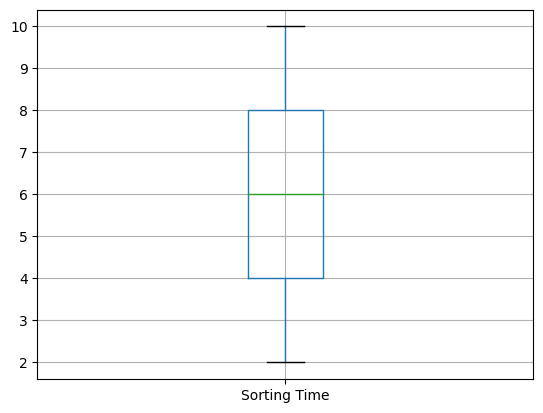

In [26]:
df.boxplot(column="Sorting Time")#no outliers found

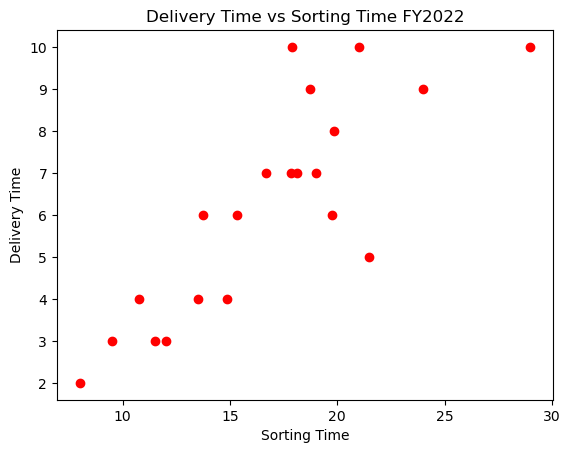

In [27]:
import matplotlib.pyplot as plt
plt.scatter(df["Delivery Time"],df["Sorting Time"], color="red")
plt.ylabel("Delivery Time")
plt.xlabel("Sorting Time")
plt.title("Delivery Time vs Sorting Time FY2022")
plt.show()

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

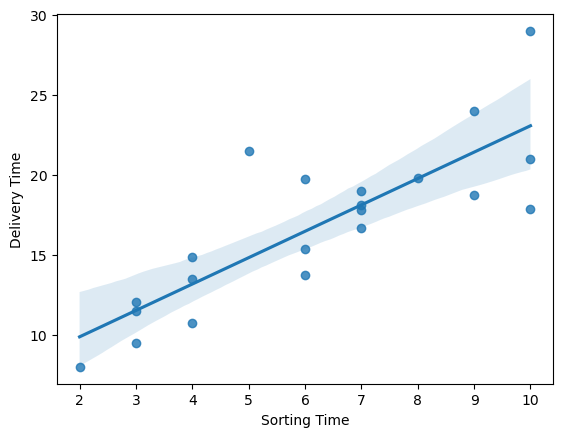

In [11]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

In [ ]:
# We can observe linear relationship between  sorting time and delivery time

array([[<Axes: title={'center': 'Delivery Time'}>,
        <Axes: title={'center': 'Sorting Time'}>]], dtype=object)

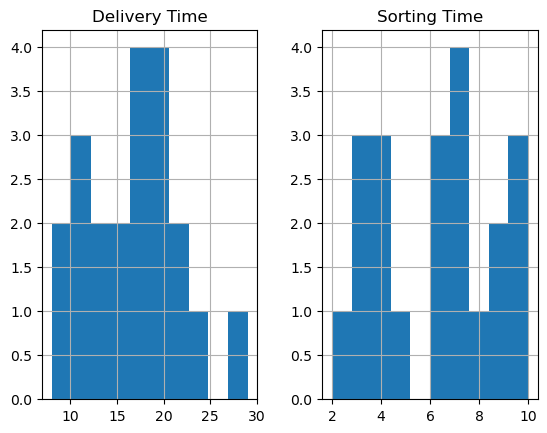

In [28]:
# check for normal distribution using histogram
df.hist()
# Data doesn't show normal distribution

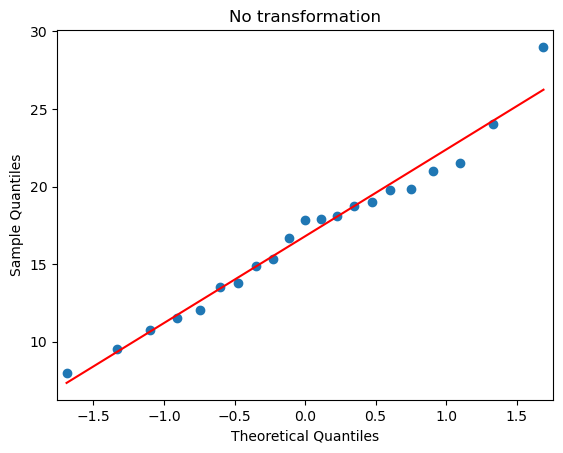

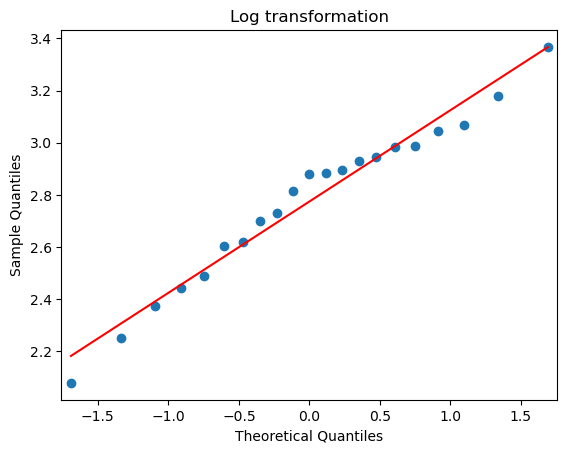

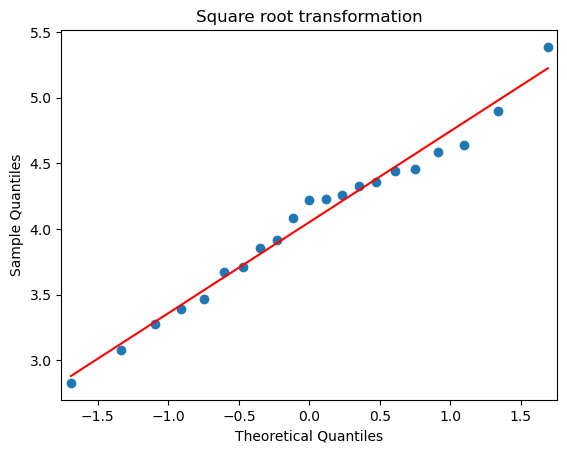

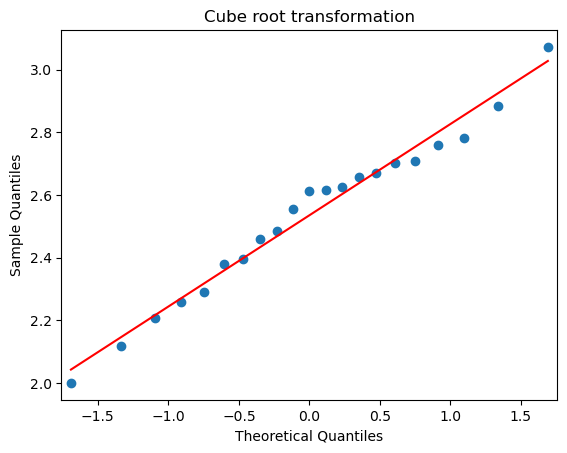

In [32]:
import numpy as np
import statsmodels.api as stm
stm.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
stm.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
stm.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
stm.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

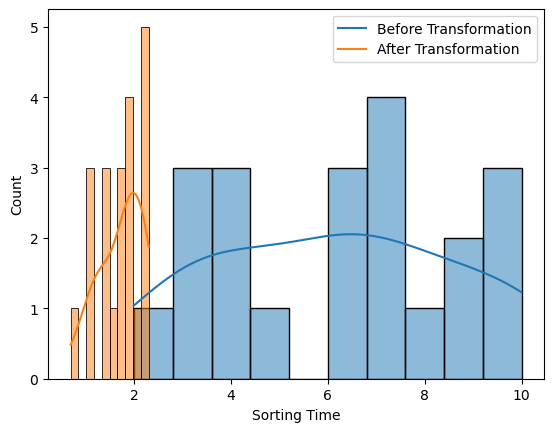

In [33]:
labels = ['Before Transformation','After Transformation']
sns.histplot(df['Sorting Time'], bins = 10, kde = True)
sns.histplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

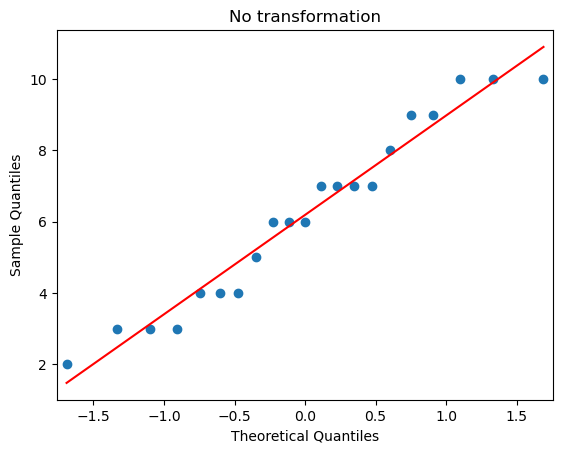

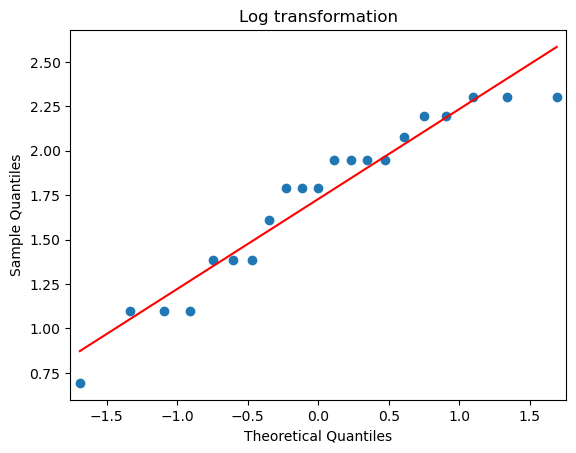

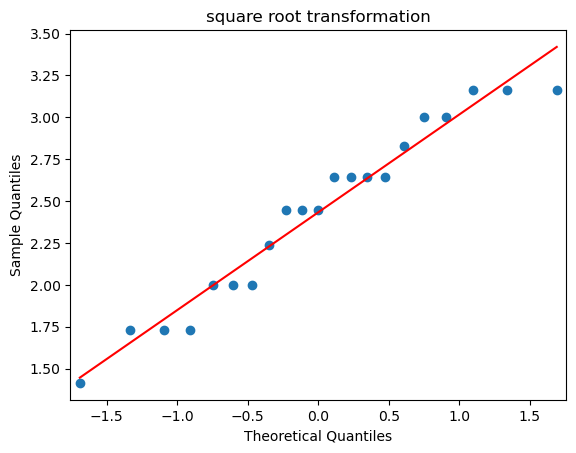

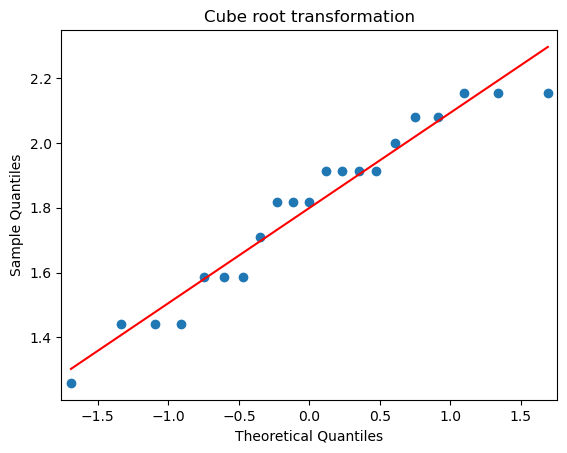

In [34]:
stm.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')
stm.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')
stm.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('square root transformation')
stm.qqplot(np.cbrt(df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [19]:
#BUILDING SLR MODEL
import statsmodels.formula.api as smf
slr=smf.ols("delivery_time~sorting_time",data=df1).fit()

In [13]:
#slr model
df1=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [24]:
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        23:28:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
slr.rsquared , slr.rsquared_adj#Rsquared Values

(0.6822714748417231, 0.6655489208860244)

In [ ]:
# We got  R-squared:0.682,Adj. R-squared:0.666, both below .85 or 85%
# Need to Improve the model with Data Trandformation

In [36]:
#----Square Root transformation on data----
slr_sqrt = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = df1).fit()
slr_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Sun, 02 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                            23:46:24   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
slr_sqrt.rsquared , slr_sqrt.rsquared_adj#Rsquared Values

(0.7292011987544664, 0.7149486302678594)

In [ ]:
#After Square Root transformation on the Data, R-squared and Adjusted R-squared scores 
# have increased but they are still below 0.85

In [39]:
#----Cube Root transformation on Data
slr_cbrt = smf.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = df1).fit()
slr_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Sun, 02 Apr 2023   Prob (F-statistic):           4.90e-07
Time:                            23:48:18   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
slr_cbrt.rsquared , slr_cbrt.rsquared_adj#Rsquared Values

(0.744116757756627, 0.7306492186911864)

In [ ]:
# After Cueb root transformation on the Data, R-squared and Adjusted R-squared scores 
# have increased but they are still below 0.85 

In [42]:
#-----Log transformation on Data
slr_log = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = df1).fit()
slr_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 02 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                           23:50:07   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
slr_log.rsquared , slr_log.rsquared_adj#Rsquared Values

(0.77216134926874, 0.7601698413355158)

In [ ]:
"""After log transformation , Model has scored the highest R-squared and Adjusted R-squared scores than
the previous model but both Adjusted R-squared and R-squared scores are still below 0.85 but closest to 0.8 .
"""

In [45]:
slr.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [46]:
slr_sqrt.params

Intercept                1.613479
np.sqrt(sorting_time)    1.002217
dtype: float64

In [47]:
slr_cbrt.params

Intercept                1.013571
np.cbrt(sorting_time)    0.845585
dtype: float64

In [49]:
slr_log.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

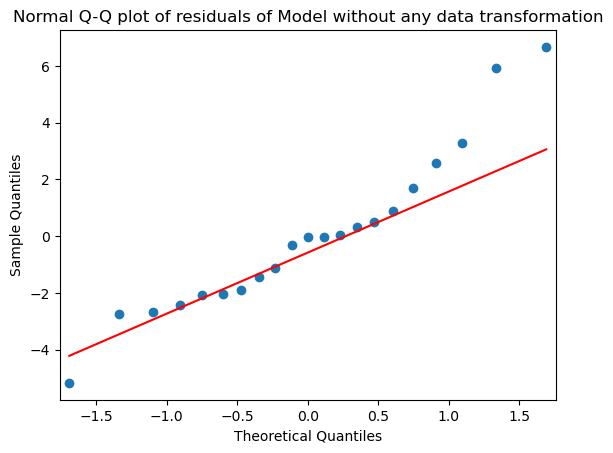

In [50]:
stm.qqplot(slr.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

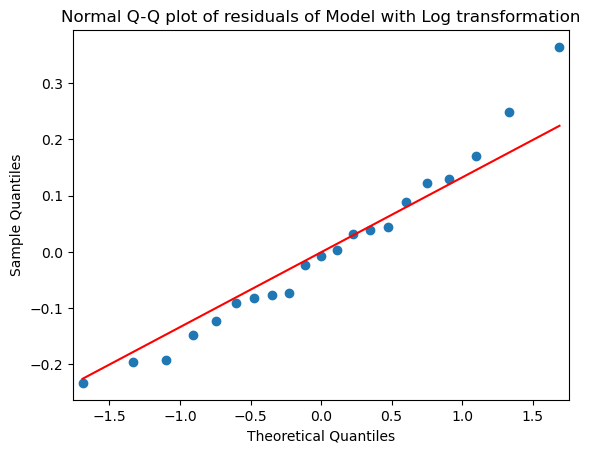

In [51]:
stm.qqplot(slr_log.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

In [52]:
#The model after log-transformation follows normal distributon with less skewness than first model

#-----RMSE VALUES----
from sklearn.metrics import mean_squared_error
model_sqrt_pred_y =np.square(slr_sqrt.predict(df1['sorting_time']))
model_cbrt_pred_y =pow(slr_cbrt.predict(df1['sorting_time']),3)
model_log_pred_y =np.exp(slr_log.predict(df1['sorting_time']))

In [54]:
model_sqrt_rmse =np.sqrt(mean_squared_error(df1['delivery_time'], model_sqrt_pred_y))
model_cbrt_rmse =np.sqrt(mean_squared_error(df1['delivery_time'], model_cbrt_pred_y))
model_log_rmse =np.sqrt(mean_squared_error(df1['delivery_time'], model_log_pred_y))
print('model_no_transf=', np.sqrt(slr.mse_resid),'\n' 'model_sqrt=', model_sqrt_rmse,'\n' 'model_cbrt=', model_cbrt_rmse,'\n' 'model_log=', model_log_rmse)

model_no_transf= 2.9349037688901394 
model_sqrt= 2.762294279320867 
model_cbrt= 2.755584309893575 
model_log= 2.7458288976145497


In [56]:
data = {'model': np.sqrt(slr.mse_resid), 'model1': model_sqrt_rmse, 'model2': model_cbrt_rmse, 'model3' : model_log_rmse}
min(data, key=data.get)

'model3'

In [ ]:
#model3 is the model where we did log transformation 

In [ ]:
#

predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_Time)))
predicted

